<Axes: >

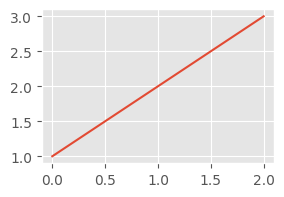

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))


# 데이터 불러오기

In [2]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('data/advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 다중회귀

## 변수 선택

In [3]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------

X = df[['TV','Radio','Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 모델 생성 및 훈련

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 평가

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model.predict(X_test)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('===다중회귀 모델의 평가결과===')
print(f'R2:{r2:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')

===다중회귀 모델의 평가결과===
R2:0.91
RMSE:1.55
MAE:1.12
MSE:2.40


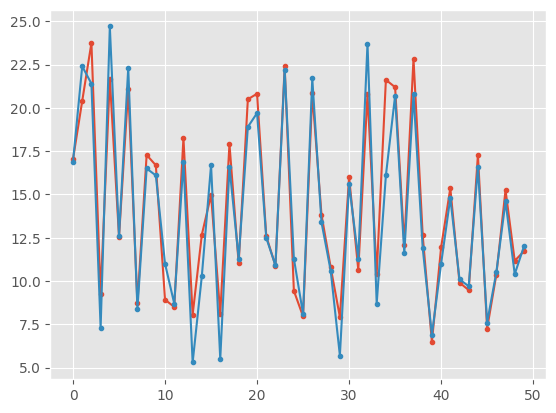

In [7]:
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='pred')
pass

## 모델의 학습 결과

In [8]:
print(f'회귀계수:{model.coef_}')
print(f'절편:{model.intercept_}')

w1 = model.coef_[0]
w2 = model.coef_[1]
w3 = model.coef_[2]

b = model.intercept_

print(f'회귀식:{w1} * tv + {w2} * radio + {w3} * newspaper + {b}')

회귀계수:[0.05461383 0.09975946 0.00430495]
절편:4.741842244124568
회귀식:0.05461383423987013 * tv + 0.0997594634936156 * radio + 0.004304951015039124 * newspaper + 4.741842244124568


## 새로운 값 예측하기
* 스케일링 된 데이터로 훈련했으므로 예측할 데이터도 스케일링을 해주어야 한다.
* 훈련세트에서 사용한 스케일려를 이용하여 스케일링한다.
* 이 때는 fit 하지 않고 transform만 한다.

In [9]:
new_data = [[175,15,2]]
model.predict(new_data)

c:\workspace\python\dataschool_준비용\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.80426509])

## 모델 저장 및 활용

#### 모델 저장

In [10]:
import joblib
joblib.dump(model, 'model/lr_model.pkl')

['model/lr_model.pkl']

#### 모델 불러와 사용하기

In [11]:
# ---------------------
# 모델 불러오기
# ---------------------
loaded_model = joblib.load('model/lr_model.pkl')

# ------------------------------------
# 예측
# ------------------------------------
new_data = [[175,15,2]]
loaded_model.predict(new_data)

c:\workspace\python\dataschool_준비용\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.80426509])